## PART B – DATA ANALYSIS

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import bernoulli, binom, poisson

### Load Dataset

In [21]:
df = pd.read_csv("spread_locator_dataset.csv")

df.head()

,transaction_id,customer_id,transaction_amount,transaction_date,transaction_count,region,transaction_status
0,e98aa092-3770-4fdb-9502-5b5a6a244811,CUST2824,3821.34,2023-01-26,3,North,Fail
1,11ba6918-dba0-41e5-96cf-f5a7b95f0103,CUST1409,2781.84,2023-01-28,0,East,Fail
2,82b7654b-6eb7-4579-89a0-1a9edec0a7bb,CUST5506,4120.97,2023-01-28,0,South,Fail
3,f7166574-f400-4d53-b526-0b11f6619ddf,CUST5012,6383.78,2023-01-18,2,South,Success
4,8632fe26-b507-4068-9c68-1b2fa04fecb3,CUST4657,2651.61,2023-01-04,4,North,Success


### BERNOULLI DISTRIBUTION 

(Transaction Occurrence)

In [22]:
df['success'] = df['transaction_status'].apply(lambda x: 1 if x == "Success" else 0)

p = df['success'].mean() # probability of success

# Single trial outcomes
x_success = 1
x_fail = 0

# Manual Bernoulli
bern_success_manual = p**x_success * (1-p)**(1-x_success)
bern_fail_manual = p**x_fail * (1-p)**(1-x_fail)

# Scipy Bernoulli
bern_success_scipy = bernoulli.pmf(1, p)
bern_fail_scipy = bernoulli.pmf(0, p)

print("BERNOULLI DISTRIBUTION (Transaction Occurrence)")
print("------------------------------------------------")
print("Estimated p:", p)
print("Manual P(Success=1):", bern_success_manual)
print("SciPy P(Success=1):", bern_success_scipy)
print("Manual P(Fail=0):", bern_fail_manual)
print("SciPy P(Fail=0):", bern_fail_scipy)


BERNOULLI DISTRIBUTION (Transaction Occurrence)
------------------------------------------------
Estimated p: 0.44545454545454544
Manual P(Success=1): 0.44545454545454544
SciPy P(Success=1): 0.44545454545454544
Manual P(Fail=0): 0.5545454545454546
SciPy P(Fail=0): 0.5545454545454546


### BINOMIAL DISTRIBUTION

(Weekly Transaction Count)

In [23]:
n = df['transaction_count'].max() # Number of weekly trials 
k = 3 # Probability of exactly 3 successful transactions

# Manual Binomial
comb = math.comb(n, k)
binomial_manual = comb * (p**k) * ((1-p)**(n-k))

# Scipy Binomail
binomial_scipy = binom.pmf(k, n, p)

# Cumulative probability p(x <= k)
binomial_cdf = binom.cdf(k, n, p)

# Output
print("\nBINOMIAL DISTRIBUTION (Weekly Transaction Count)")
print("------------------------------------------------")
print("n (weekly trials):", n)
print("k (successes considered):", k)
print("Manual P(X=3):", binomial_manual)
print("SciPy P(X=3):", binomial_scipy)
print("SciPy CDF P(X<=3):", binomial_cdf)



BINOMIAL DISTRIBUTION (Weekly Transaction Count)
------------------------------------------------
n (weekly trials): 9
k (successes considered): 3
Manual P(X=3): 0.2159296942387397
SciPy P(X=3): 0.21592969423873956
SciPy CDF P(X<=3): 0.371948079338253


### POISSON DISTRIBUTION

(Transactions Per Day)

In [24]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

transactions_per_day = df.groupby('transaction_date').size()

transactions_per_day.head()

transaction_date
2023-01-01     6
2023-01-02    12
2023-01-03    10
2023-01-04     7
2023-01-05     9
dtype: int64

In [27]:
lambda_value = transactions_per_day.mean()
k = 5 # Probability of exactly 5 calls

poisson = poisson.pmf(k, lambda_value)
poisson

np.float64(0.12417489954176612)

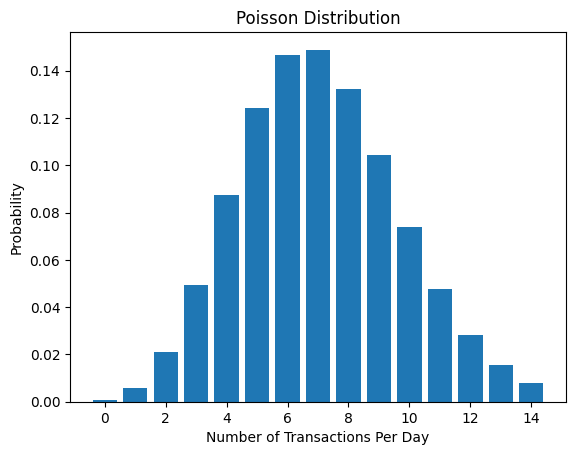

In [28]:
from scipy.stats import poisson

x = np.arange(0,15)
probs = poisson.pmf(x, lambda_value)

plt.bar(x, probs)
plt.title(f"Poisson Distribution")
plt.xlabel("Number of Transactions Per Day")
plt.ylabel("Probability")
plt.show()